# 1. MNIST digit image

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

In [ ]:
print(x_train.shape, y_train.shape, sep='\n')
print(y_train)

(60000, 28, 28)
(60000,)
[5 0 4 ... 5 6 8]


In [ ]:
print(x_test.shape, y_test.shape, sep='\n')
print(y_test)

(10000, 28, 28)
(10000,)
[7 2 1 ... 4 5 6]


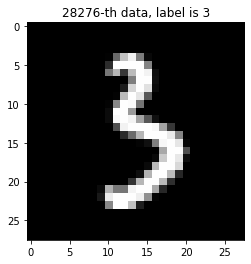

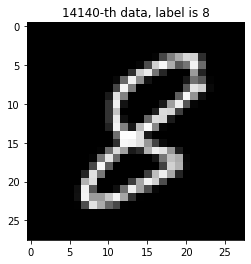

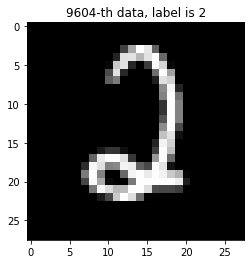

In [ ]:
%matplotlib inline
sample_size = 3

random_idx = np.random.randint(60000, size=sample_size)

for idx in random_idx:
    img = x_train[idx]
    label = y_train[idx]
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.grid(False)
    plt.title("%d-th data, label is %d" % (idx, label))

In [ ]:
# valid dataset
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=777)
print(f'훈련 데이터 {x_train.shape}, 레이블 {y_train.shape}')
print(f'검증 데이터 {x_val.shape}, 레이블 {y_val.shape}')      

훈련 데이터 (42000, 28, 28), 레이블 (42000,)
검증 데이터 (18000, 28, 28), 레이블 (18000,)


In [ ]:
# 입력을 위해 input reshape + normalization
x_train = (x_train.reshape(-1, 28*28))/255
x_val = (x_val.reshape(-1, 28*28))/255
x_test = (x_test.reshape(-1, 28*28))/255

print(x_train.shape)

(42000, 784)


In [ ]:
# label -> one-hot encoding
from tensorflow.keras.utils import to_categorical

# 각 데이터의 레이블을 범주형 형태로 변경
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)
print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**1. model 구성**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(64, input_shape=(x_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

**2. compile(학습과정 설정)**

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['acc'])

**3. training**

- history 객체 활용

In [ ]:
history = model.fit(x_train,y_train,epochs=30,batch_size=128,validation_data=(x_val, y_val))

Epoch 1/30
329/329 [==============================] - 1s 4ms/step - loss: 0.5006 - acc: 0.8580 - val_loss: 0.2507 - val_acc: 0.9276
Epoch 2/30
329/329 [==============================] - 1s 3ms/step - loss: 0.2144 - acc: 0.9385 - val_loss: 0.1868 - val_acc: 0.9457
Epoch 3/30
329/329 [==============================] - 1s 3ms/step - loss: 0.1645 - acc: 0.9521 - val_loss: 0.1577 - val_acc: 0.9551
Epoch 4/30
329/329 [==============================] - 1s 3ms/step - loss: 0.1306 - acc: 0.9623 - val_loss: 0.1449 - val_acc: 0.9579
Epoch 5/30
329/329 [==============================] - 1s 3ms/step - loss: 0.1126 - acc: 0.9668 - val_loss: 0.1308 - val_acc: 0.9609
Epoch 6/30
329/329 [==============================] - 1s 3ms/step - loss: 0.0953 - acc: 0.9722 - val_loss: 0.1215 - val_acc: 0.9644
Epoch 7/30
329/329 [==============================] - 1s 3ms/step - loss: 0.0825 - acc: 0.9758 - val_loss: 0.1204 - val_acc: 0.9629
Epoch 8/30
329/329 [==============================] - 1s 3ms/step - loss: 0.

**4. history 객체 값으로 학습 결과 그려보기**

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [ ]:
len(history.history['loss'])

30

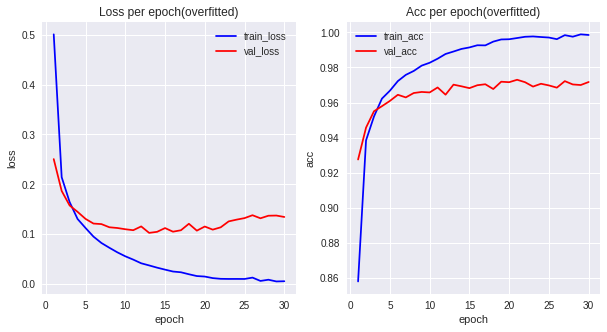

In [56]:
hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']

acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

epochs = range(1, len(loss)+1)

fig = plt.figure(figsize=(10,5))

# loss 그리기
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title("Loss per epoch(overfitted)")
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss")
ax1.legend()

# acc 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'red', label = 'val_acc')
ax2.set_title("Acc per epoch(overfitted)")
ax2.set_xlabel("epoch")
ax2.set_ylabel("acc")
ax2.legend()

plt.style.use("seaborn")
plt.show()

**5. 모델 평가 - confusion matrix**

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

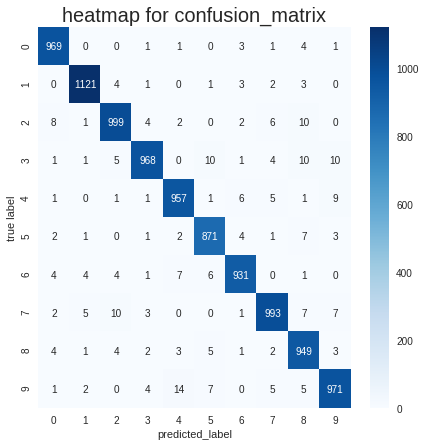

In [61]:
plt.figure(figsize=(7,7))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(x_test),axis=1))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel("predicted_label")
plt.ylabel("true label")
plt.title("heatmap for confusion_matrix", fontsize=20)
plt.show()

**Classification_report**

In [ ]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(model.predict(x_test),axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.96      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.98      0.97       892
           6       0.98      0.97      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.95      0.97      0.96       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
y_test.shape

(10000, 10)

In [ ]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
np.argmax(y_test, axis=1).shape

(10000,)

In [ ]:
np.argmax(y_test, axis=)

(10,)

In [ ]:
model.predict(x_test)

(10000, 10)

In [ ]:
confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(x_test),axis=1))

array([[ 969,    0,    0,    1,    1,    0,    3,    1,    4,    1],
       [   0, 1121,    4,    1,    0,    1,    3,    2,    3,    0],
       [   8,    1,  999,    4,    2,    0,    2,    6,   10,    0],
       [   1,    1,    5,  968,    0,   10,    1,    4,   10,   10],
       [   1,    0,    1,    1,  957,    1,    6,    5,    1,    9],
       [   2,    1,    0,    1,    2,  871,    4,    1,    7,    3],
       [   4,    4,    4,    1,    7,    6,  931,    0,    1,    0],
       [   2,    5,   10,    3,    0,    0,    1,  993,    7,    7],
       [   4,    1,    4,    2,    3,    5,    1,    2,  949,    3],
       [   1,    2,    0,    4,   14,    7,    0,    5,    5,  971]])